#### import string
import collections
import random
from collections import Counter
import pandas as pd
import numpy as np 
import re
import unicodedata
import pickle
import warnings
from collections import defaultdict
import operator

import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib as mpl


from sklearn.pipeline import Pipeline
from sklearn.model_selection  import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVC
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from imblearn.under_sampling import ClusterCentroids
from sklearn import svm
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgbm
from sklearn.manifold import TSNE
from sklearn.manifold import MDS
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud

import nltk
from nltk import *
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import word_tokenize
from nltk.tokenize import *
from nltk.collocations import *

from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

import prince

from scipy.cluster import hierarchy
from scipy import ndimage
from scipy.misc import imread
from scipy import stats
from PIL import Image
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

from yelpapi import YelpAPI #External data source
import facebook #External data source GraphAPI


import pyLDAvis.gensim as gensimvis
import pyLDAvis
warnings.filterwarnings('ignore')

###### Nulla- sampling Initial File File

####  I- Brand Preprocessing | Getting Data From API  


    1- yelpAPI Classification

    2- Facebook GraphAPI Classification

    3- Constructing Rating

#### II- Removing Outliers


#### III- Upload Cleaned DataFrame

In [2]:
df = pd.read_hdf('../input/NoNaN100KRmOutliers.hdf',key="imsd")
df.reset_index(inplace=True,drop=True)

In [3]:
print("Shape : "+str(df.shape))

Shape : (127357, 7)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127357 entries, 0 to 127356
Data columns (total 7 columns):
name                 127357 non-null object
item_condition_id    127357 non-null int64
category_name        127357 non-null object
price                127357 non-null float64
shipping             127357 non-null int64
item_description     127357 non-null object
brand_name           127357 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 6.8+ MB


In [5]:
df.describe()

,item_condition_id,price,shipping
count,127357.000000,127357.000000,127357.000000
mean,2.033646,30.277185,0.388381
std,0.905187,41.328897,0.487384
min,1.000000,3.000000,0.000000
25%,1.000000,12.000000,0.000000
50%,2.000000,20.000000,0.000000
75%,3.000000,34.000000,1.000000
max,5.000000,1700.000000,1.000000


In [6]:
#Reducing Diff NIKE == nike == Nike 
def treat(elt):
    if(isinstance(elt,str)):
        return elt.lower()
    return str(elt).lower()

#Eliminating Accents é == e | à == a
def harmonizeString(x):
    x = str(x)
    return ''.join((c for c in unicodedata.normalize('NFD', x) if unicodedata.category(c) != 'Mn'))
     

df["brand_name"] = df["brand_name"].apply(lambda x: np.NaN if(pd.isnull(x)) else treat(x))
df["category_name"] = df["category_name"].apply(lambda x: np.NaN if(pd.isnull(x)) else treat(x))
df["name"] = df["name"].apply(lambda x: np.NaN if(pd.isnull(x)) else treat(x))
df["item_description"] = df["item_description"].apply(lambda x: np.NaN if(pd.isnull(x)) else treat(x))

df["brand_name"] = df["brand_name"].apply(lambda x: np.NaN if(pd.isnull(x)) else harmonizeString(x))
df["category_name"] = df["category_name"].apply(lambda x: np.NaN if(pd.isnull(x)) else harmonizeString(x))
df["name"] = df["name"].apply(lambda x: np.NaN if(pd.isnull(x)) else harmonizeString(x))
df["item_description"] = df["item_description"].apply(lambda x: np.NaN if(pd.isnull(x)) else harmonizeString(x))

####  IV- Vizualisation

    0- Price Field
            0-0- Anova one-way on the shipping : Sigificance

In [7]:
# H0 : ItemCondition Dosen't affect the price
Price1 = df[(df["shipping"] == 1)]["price"].values.tolist() 
Price2 = df[(df["shipping"] == 0)]["price"].values.tolist() 
stat, pvalue = stats.f_oneway(Price1, Price2)
print(stat, pvalue)

762.034431526 3.02760089076e-167


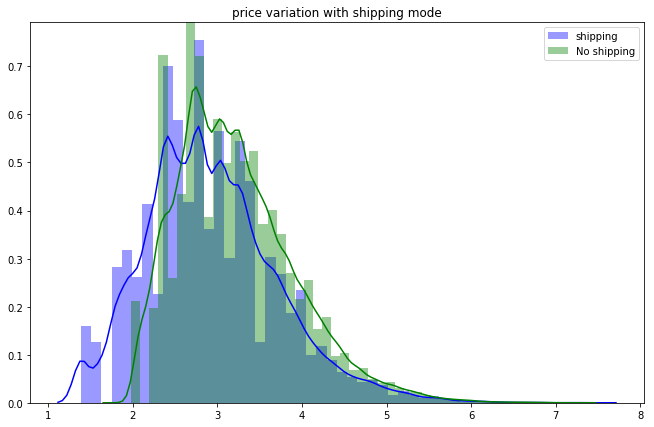

In [8]:
# Lets check if shipping has any impact on prices 
fig, ax = plt.subplots(figsize=(11, 7), sharex=True, sharey=True)
sns.distplot(np.log(df.loc[df['shipping']==1]['price'].values+1),  color='blue', label='shipping')
sns.distplot(np.log(df.loc[df['shipping']==0]['price'].values+1),  color='green', label='No shipping')
plt.title("price variation with shipping mode")
ax.legend(loc=0)
plt.show()

# H0 : ItemCondition Dosen't affect the price
Price1 = df[(df["shipping"] == 1)]["price"].values.tolist() 
Price2 = df[(df["shipping"] == 0)]["price"].values.tolist() 
stat, pvalue = stats.f_oneway(Price1, Price2)
print(stat, pvalue)

In [9]:
df['no_description'] = [0]*df.shape[0]
df.loc[((df['item_description']=='no description yet') | df['item_description'].isnull()), 'no_description'] = 1

In [10]:
# H0 : Description's presence Dosen't affect the price
Price1 = df[(df["no_description"] == 1)]["price"].values.tolist() 
Price2 = df[(df["no_description"] == 0)]["price"].values.tolist() 
stat, pvalue = stats.f_oneway(Price1, Price2)
print(stat, pvalue)

121.666918497 2.81214352695e-28


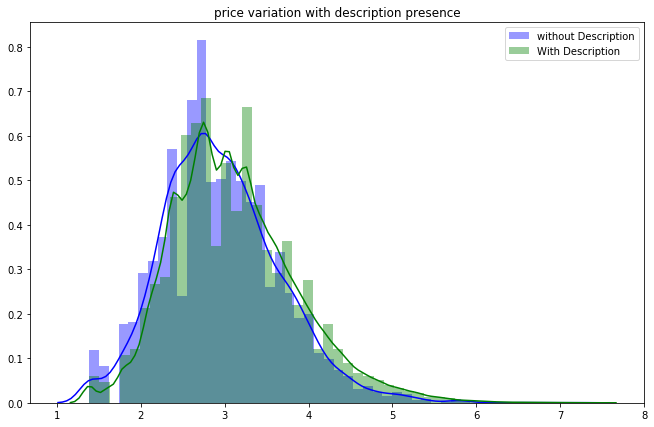

In [11]:
# Lets check if shipping has any impact on prices 
fig, ax = plt.subplots(figsize=(11, 7), sharex=True, sharey=True)
sns.distplot(np.log(df.loc[df['no_description']==1]['price'].values+1),  color='blue', label='without Description')
sns.distplot(np.log(df.loc[df['no_description']==0]['price'].values+1),  color='green', label='With Description')
plt.title("price variation with description presence")
ax.legend(loc=0)
plt.show()

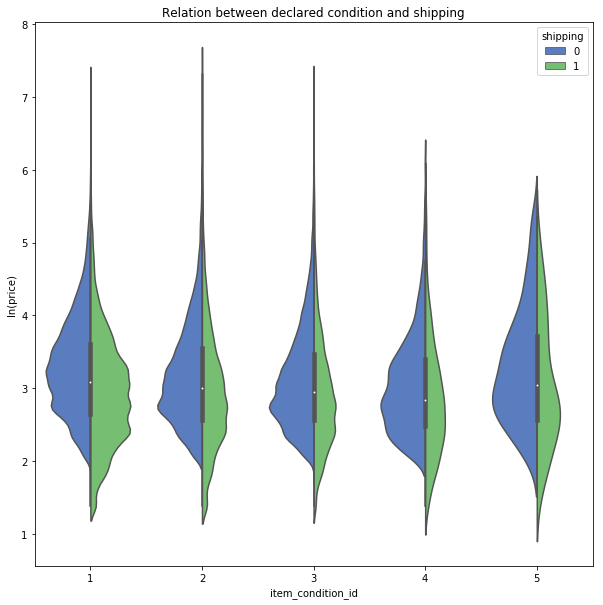

In [12]:
fig, ax = plt.subplots(figsize= (10,10))
plt.title('Relation between declared condition and shipping')
plt.xlabel("item's condition")
plt.ylabel('ln(price)')
ax = sns.violinplot(x="item_condition_id", y=np.log(df["price"].values+1), hue='shipping', data=df , scale="count", palette="muted", split=True, x_jitter = True, y_jitter = True)
plt.show()

Finding ! We observe that  the shipping options has a negative correlation with the item's condition. meaning, that when condition increase shipping articles count decreases. Same for the price, the more it increases, the shipping decreases.

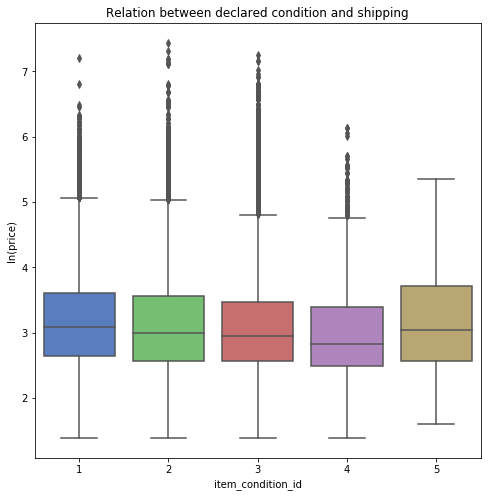

In [13]:
plt.close()
fig, ax = plt.subplots(figsize= (8,8))
plt.title('Relation between declared condition and shipping')
plt.xlabel("item's condition")
plt.ylabel('ln(price)')
ax = sns.boxplot(x="item_condition_id", y=np.log(df["price"].values+1), data=df, palette="muted")
plt.show()

    0-1- Anova one-way on the item_condition_id : Sigificance


In [14]:
# H0 : ItemCondition Dosen't affect the price
Price1 = df[(df["item_condition_id"] == 1)]["price"].values.tolist() 
Price2 = df[(df["item_condition_id"] == 2)]["price"].values.tolist() 
Price3 = df[(df["item_condition_id"] == 3)]["price"].values.tolist() 
Price4 = df[(df["item_condition_id"] == 4)]["price"].values.tolist() 
Price5 = df[(df["item_condition_id"] == 5)]["price"].values.tolist() 
stat, pvalue = stats.f_oneway(Price1, Price2,Price3,Price4,Price5)
print(stat, pvalue)

20.3442372559 9.00759026418e-17


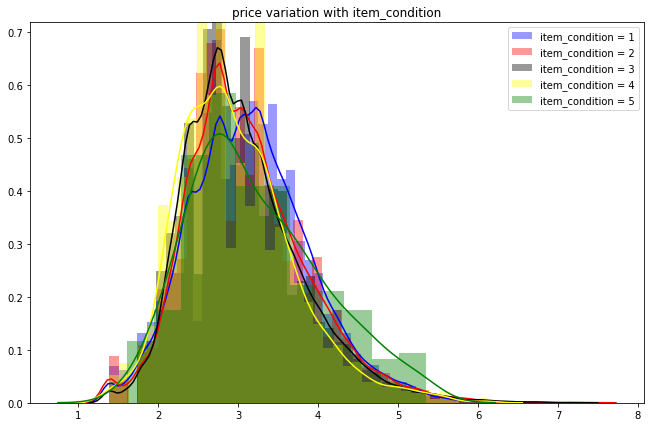

In [15]:
# Lets check if shipping has any impact on prices 
fig, ax = plt.subplots(figsize=(11, 7), sharex=True, sharey=True)
sns.distplot(np.log(np.array(Price1)+1),  color='blue', label='item_condition = 1')
sns.distplot(np.log(np.array(Price2)+1),  color='red', label='item_condition = 2')
sns.distplot(np.log(np.array(Price3)+1),  color='black', label='item_condition = 3')
sns.distplot(np.log(np.array(Price4)+1),  color='yellow', label='item_condition = 4')
sns.distplot(np.log(np.array(Price5)+1),  color='green', label='item_condition = 5')
plt.title("price variation with item_condition")
ax.legend(loc=0)
plt.show()


    1-  Brand Field

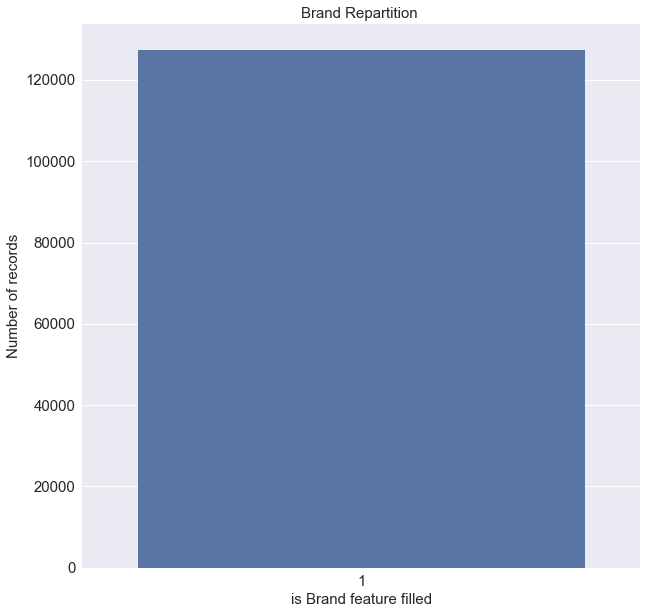

In [16]:
plt.close()
mpl.style.use("ggplot")
plt.figure(figsize=(10, 10))
df["has_Brand"] = ([1]*(df.shape)[0])
df.loc[df['brand_name'].isnull() == True, 'has_Brand'] = 0
sns.set(style="darkgrid")
sns.countplot(x="has_Brand", data=df)
plt.title("Brand Repartition ", fontsize=15)
plt.ylabel('Number of records', fontsize=15)
plt.xlabel('is Brand feature filled', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

In [17]:
def brandPlot(liste11):
    plt.figure(figsize=(20, 10))
    cpt=0
    liste1=liste11[:30]
    size = len(liste1[:30])
    x = [elt[0] for elt in liste1]
    for [xx,yy] in liste1:
        plt.barh(cpt, yy, align='center', alpha=0.5)
        cpt+=1    
    plt.yticks(range(0,size),x, fontsize=15)
    plt.xticks(fontsize=15)
    plt.title("Top 30 Brands sorted by its Article's Number ", fontsize=15)
    plt.xlabel('Count of articles', fontsize=15)
    plt.ylabel('Brand', fontsize=15)
    plt.legend(fontsize=15)
    plt.show()

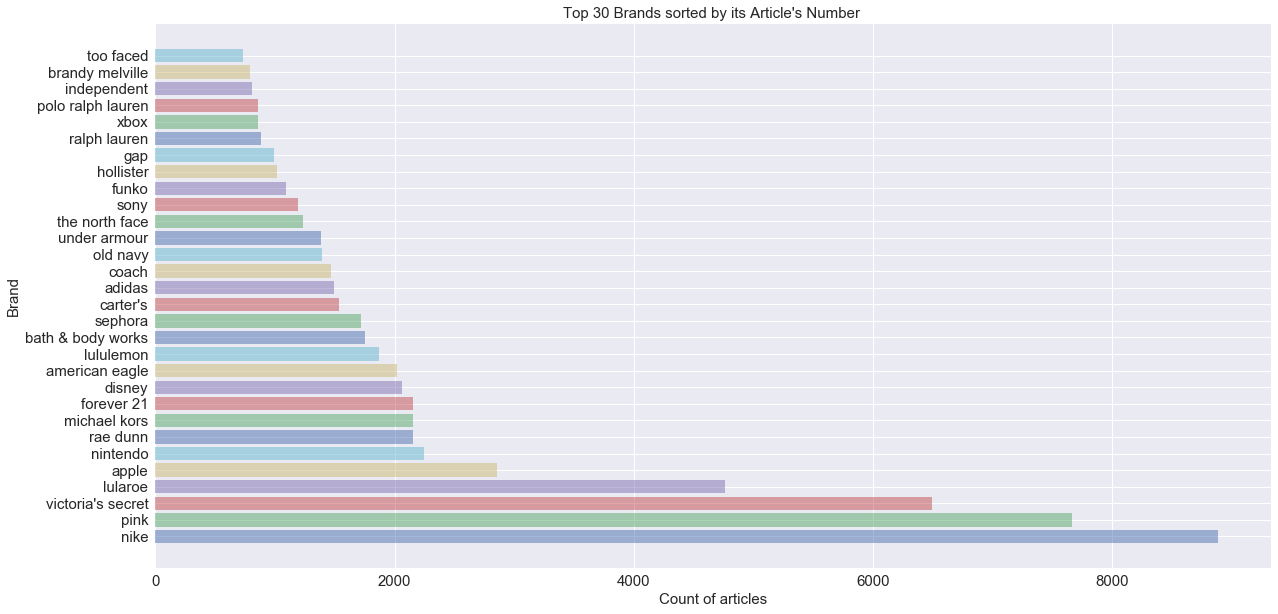

In [18]:
grouped_df = df.astype(str).groupby(["brand_name"])
grouped_df = pd.DataFrame(grouped_df.size().reset_index(name = "Group_Count"))
resultbrand = grouped_df.sort_values(by='Group_Count', ascending=False,na_position='first')
result = resultbrand[["brand_name","Group_Count"]].values.tolist()
brandPlot(result)
brandArticles = {}
for brand in result :
    brandArticles[brand[0]]=brand[1]

    2- Categories Field

In [19]:
#Defining a function which will split into three features out categories
def transform_category_name(category_name):
    try:
        mainCategory, subCategory, subsubCategory = category_name.split('/')
        return mainCategory, subCategory, subsubCategory
    except:
        return np.nan, np.nan, np.nan

In [20]:
#Creating Three Columns with the corresponding values
df['category_main'], df['category_sub1'], df['category_sub2'] = zip(*df['category_name'].apply(transform_category_name))

In [21]:
def plotBarHDisctionnary(liste11,category):
    plt.figure(figsize=(15, 10))
    cpt=0
    liste1=liste11[:30]
    size = len(liste1[:30])
    x = [elt[0] for elt in liste1]
    for [xx,yy] in liste1:
        plt.barh(cpt, yy, align='center', alpha=0.5)
        cpt+=1    
    plt.yticks(range(0,size),x, fontsize=15)
    plt.xticks(fontsize=15)
    plt.title("Top 30 "+category+" categories sorted by its Article's Number ", fontsize=15)
    plt.xlabel('Count of articles', fontsize=15)
    plt.ylabel(category+' categorie', fontsize=15)
    plt.legend(fontsize=15)
    plt.show()


In [22]:
grouped_df = df.astype(str).groupby(["category_main"])
grouped_df = pd.DataFrame(grouped_df.size().reset_index(name = "Group_Count"))
result = grouped_df.sort_values(by='Group_Count', ascending=False,na_position='first')
resultMain = result[["category_main","Group_Count"]].values.tolist()

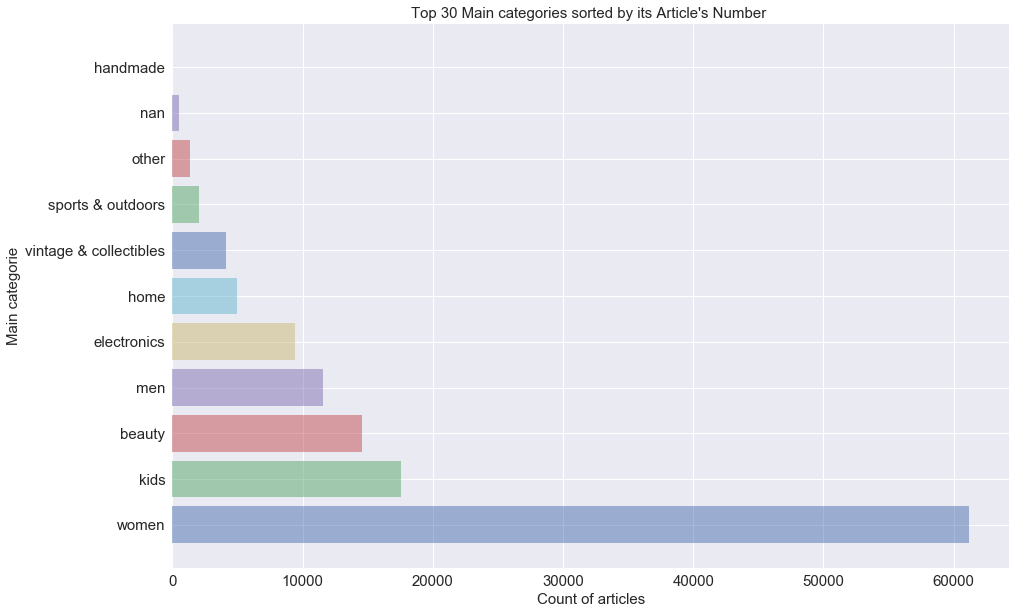

In [23]:
plotBarHDisctionnary(resultMain,'Main')

In [24]:
grouped_df = df.astype(str).groupby(["category_sub1"])
grouped_df = pd.DataFrame(grouped_df.size().reset_index(name = "Group_Count"))
result = grouped_df.sort_values(by='Group_Count', ascending=False,na_position='first')
resultSub = result[["category_sub1","Group_Count"]].values.tolist()

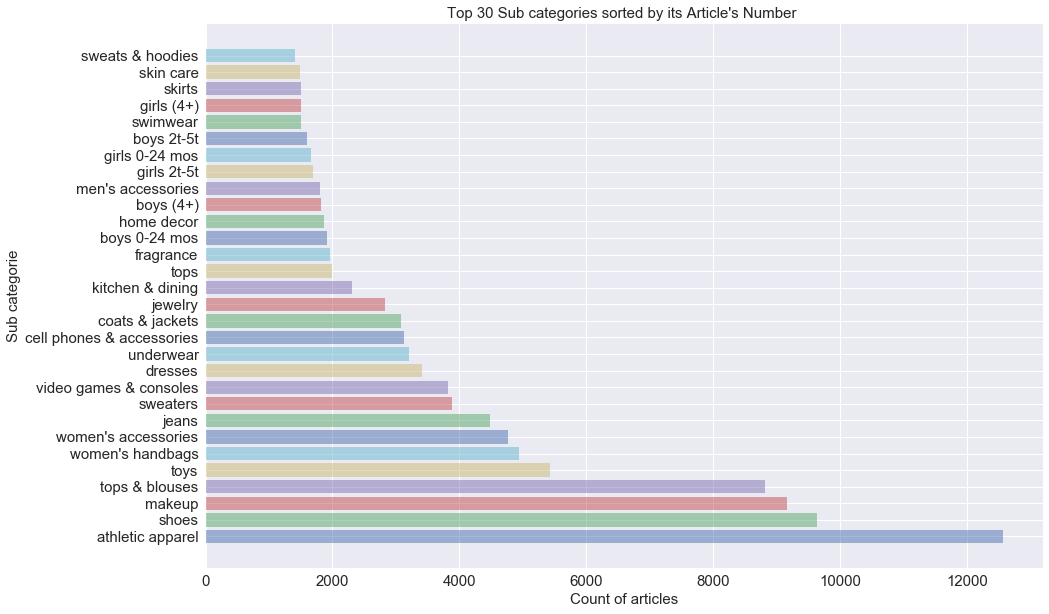

In [25]:
plotBarHDisctionnary(resultSub,'Sub')

In [26]:
grouped_df = df.astype(str).groupby(["category_sub2"])
grouped_df = pd.DataFrame(grouped_df.size().reset_index(name = "Group_Count"))
result = grouped_df.sort_values(by='Group_Count', ascending=False,na_position='first')
resultSubSub = result[["category_sub2","Group_Count"]].values.tolist()


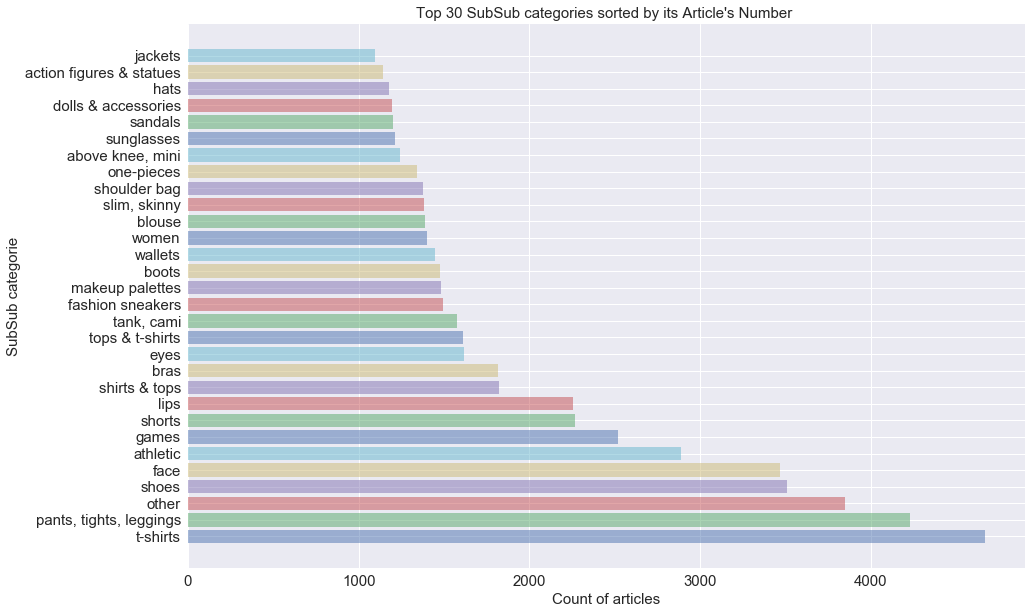

In [27]:
plotBarHDisctionnary(resultSubSub,'SubSub')

#### V- Brand's Clustering 

    0- Preprocessing DataSet

    1- Uploading DataSet 

In [28]:
dfCluster = pd.read_hdf('../input/dfBrandsClustering.hdf',key="imsd")
dfCluster.reset_index(inplace=True,drop=True)

In [29]:
dfCluster.head()

,brand_name,min,max,mean,UniQMainCat,UniQSubCat,UniQSubSubCat,std,var,articleCount,likesFB,localRatingFB,review_countFB,talking_about_countFB,were_here_countFB,localRatingYelp,review_countYelp,RatingYelp
0,kiton,85.0,85.0,85.000000,1,1,1,0.000000,0.000000,1.0,1731,69.0,14,196,3964,708.0,173.0,4.092486
1,asos,5.0,80.0,21.823529,2,9,17,13.001086,169.028235,51.0,5314859,575.3,125,19360,12880,1264.0,326.0,3.877301
2,samsung,3.0,356.0,52.265306,2,6,19,65.459217,4284.909062,637.0,131604529,2464.0,560,156769,258,1268.5,288.0,4.404514
3,huggies,3.0,43.0,20.693878,1,2,3,9.115472,83.091837,49.0,5786504,150.4,32,7116,8,6844.0,1888.0,3.625000
4,rockport,13.0,46.0,29.500000,1,1,2,23.334524,544.500000,2.0,292646,0.0,0,1535,178777,1206.0,297.0,4.060606


    2- CAH

In [30]:
dfCluster.UniQMainCat = dfCluster.UniQMainCat.astype('int64')
dfCluster.UniQSubCat  = dfCluster.UniQSubCat.astype('int64')
dfCluster.UniQSubSubCat = dfCluster.UniQSubSubCat.astype('int64')
dfCluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 18 columns):
brand_name               2073 non-null object
min                      2073 non-null float64
max                      2073 non-null float64
mean                     2073 non-null float64
UniQMainCat              2073 non-null int64
UniQSubCat               2073 non-null int64
UniQSubSubCat            2073 non-null int64
std                      2073 non-null float64
var                      2073 non-null float64
articleCount             2073 non-null float64
likesFB                  2073 non-null int64
localRatingFB            2073 non-null float64
review_countFB           2073 non-null int64
talking_about_countFB    2073 non-null int64
were_here_countFB        2073 non-null int64
localRatingYelp          2073 non-null float64
review_countYelp         2073 non-null float64
RatingYelp               2073 non-null float64
dtypes: float64(10), int64(7), object(1)
memory usage: 291.6+ 

In [31]:
dfCluster = dfCluster.set_index("brand_name")

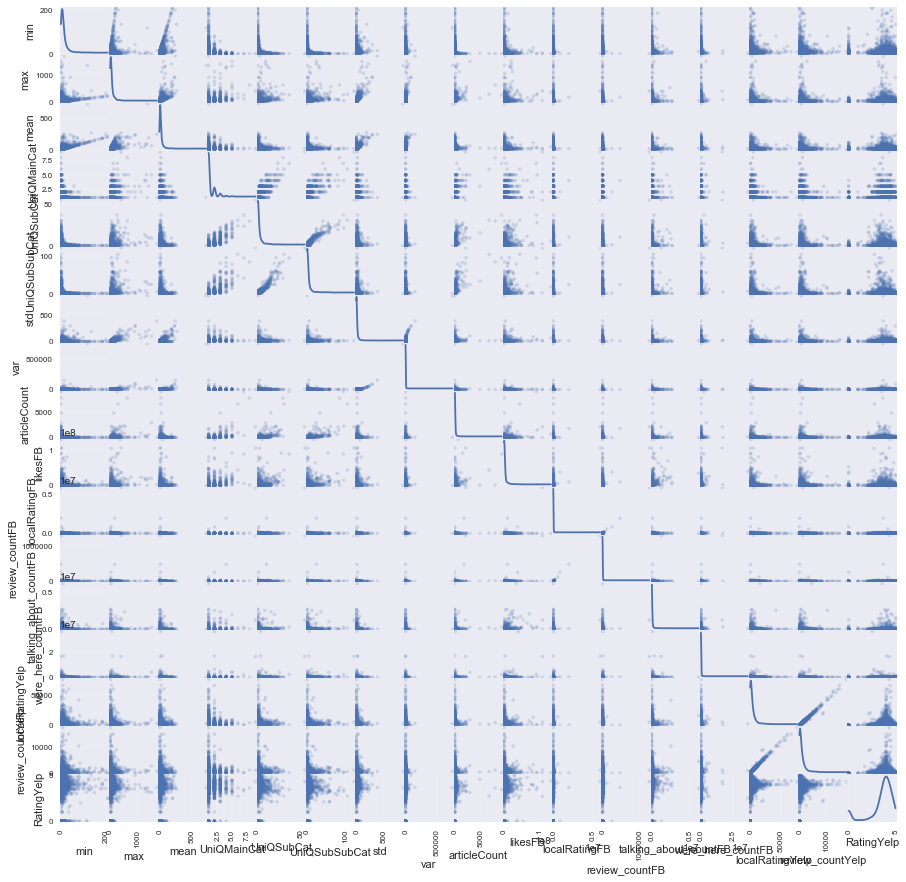

In [109]:
from pandas.plotting import scatter_matrix
scatter_matrix(dfCluster, alpha=0.2, figsize=(15, 15), diagonal='kde')
plt.show()

On voit bien une liaison linéaire entre les rating et le nombre de commentaires.

In [112]:
from sklearn import metrics
from scipy.spatial.distance import cdist
#Remplacement des valeurs manquantes
dfCluster =dfCluster.fillna(method='pad')
# k means determine k
distortions = []
K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(dfCluster)
    kmeanModel.fit(dfCluster)
    distortions.append(sum(np.min(cdist(dfCluster, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / dfCluster.shape[0])

clusters_df = pd.DataFrame({ "num_clusters":K, "cluster_errors": distortions })
clusters_df[0:12]

,cluster_errors,num_clusters
0,3.675958e+06,1
1,2.501975e+06,2
2,1.882327e+06,3
3,1.342304e+06,4
4,1.165141e+06,5
5,1.126802e+06,6
6,8.472523e+05,7
7,8.272042e+05,8
8,7.055627e+05,9
9,6.487913e+05,10


Here we can see that we have a weird values of errors. So we can conclude that our data is not normalized.

-Normalization refers to rescaling real valued numeric attributes into the range 0 and 1
-Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance).


In [126]:
from sklearn import preprocessing
data_clustering = dfCluster.select_dtypes(exclude=['object'])
data_clustering.head()
# normalize the data attributes
normalized_X = preprocessing.normalize(dfCluster)
# standardize the data attributes
standardized_X = preprocessing.scale(normalized_X)
data_normalized_clustering= (dfCluster-dfCluster.mean())/dfCluster.std()

In [127]:
data_normalized_clustering.head()

,min,max,mean,UniQMainCat,UniQSubCat,UniQSubSubCat,std,var,articleCount,likesFB,localRatingFB,review_countFB,talking_about_countFB,were_here_countFB,localRatingYelp,review_countYelp,RatingYelp
brand_name,,,,,,,,,,,,,,,,,
kiton,3.243292,0.178759,1.643105,-0.458408,-0.448028,-0.384021,-0.400514,-0.067509,-0.165628,-0.319404,-0.054063,-0.055752,-0.217032,-0.081741,-0.471493,-0.491154,0.393024
asos,-0.541083,0.136756,-0.208719,0.808631,1.599394,1.274468,0.006724,-0.057857,-0.028601,0.307331,-0.050413,-0.052146,-0.138734,-0.072933,-0.383414,-0.393550,0.222236
samsung,-0.635692,2.455326,0.683588,0.808631,0.831611,1.481779,1.649889,0.177177,1.577364,15.204421,-0.036798,-0.038014,0.422676,-0.085402,-0.382701,-0.417791,0.640675
huggies,-0.635692,-0.174067,-0.241832,-0.458408,-0.192100,-0.176709,-0.114986,-0.062764,-0.034082,0.362966,-0.053476,-0.055167,-0.188760,-0.085649,0.500553,0.602905,0.021991
rockport,-0.162646,-0.148865,0.016293,-0.458408,-0.448028,-0.280365,0.330402,-0.036416,-0.162888,-0.285088,-0.054560,-0.056206,-0.211562,0.090946,-0.392602,-0.412050,0.367722


In [116]:
from sklearn import metrics
from scipy.spatial.distance import cdist
# create new plot and data
#plt.figure(10,10)
plt.figure(figsize=(10,8))
plt.plot()
X = np.array(list(zip(dfClusterCentred.values))).reshape(len(dfClusterCentred['mean'].values), 15)
colors = ['b', 'g', 'r']
markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()
clusters_df = pd.DataFrame({ "num_clusters":K, "cluster_errors": distortions })
clusters_df[0:12]

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [33]:
Z = linkage(dfClusterCentred,method='ward')

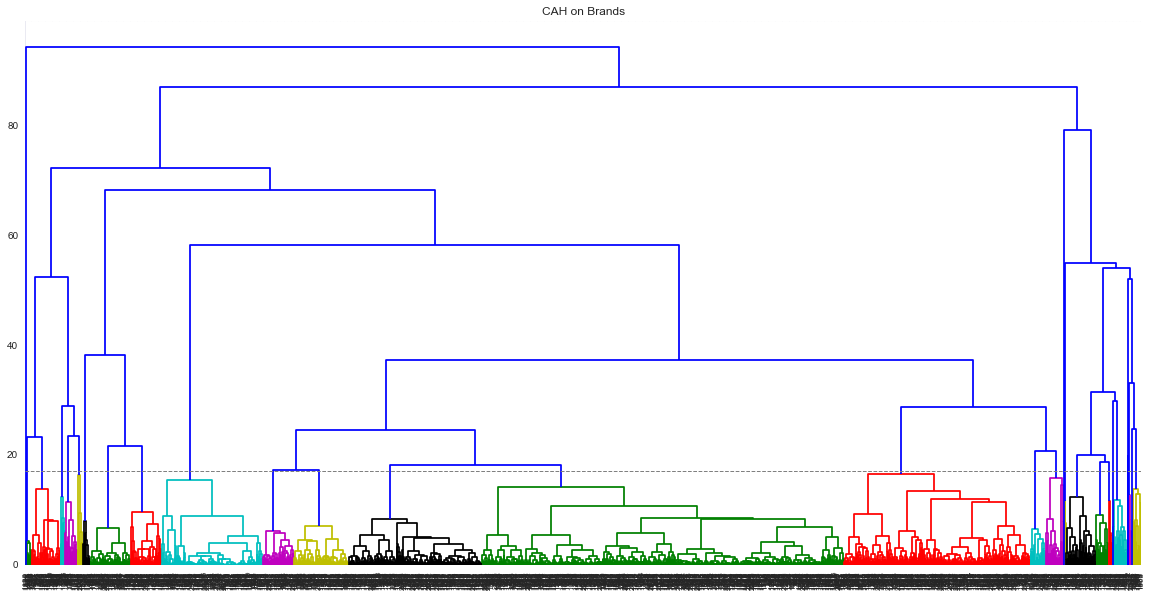

In [34]:
plt.figure(figsize=(20, 10))
hierarchy.dendrogram(Z, leaf_rotation=90, leaf_font_size=8,color_threshold=17)
plt.title("CAH on Brands")
plt.axhline(y=17, c='grey', lw=1, linestyle='dashed')
plt.show()

In [35]:
cahResults = fcluster(Z, 17,criterion="distance")
max(cahResults)

29

    2-1- Computing eigenValues

In [36]:
pca = PCA(n_components=17) #Trying the Max Components == Number of Features (17) to compute all eigenValues
pca_data = pca.fit_transform(dfClusterCentred) 
print(pca.explained_variance_)

[  4.03349213e+00   3.02691019e+00   2.05396678e+00   1.84449760e+00
   1.14407802e+00   1.05991945e+00   9.50851686e-01   7.99954674e-01
   5.89647494e-01   5.34054121e-01   4.81056756e-01   2.78116710e-01
   1.34204353e-01   4.54109700e-02   2.29913347e-02   7.18216702e-03
   1.87019729e-03]


In [37]:
cumutiveVariance = [sum(pca.explained_variance_ratio_[:i]) for i in range(1,18)]

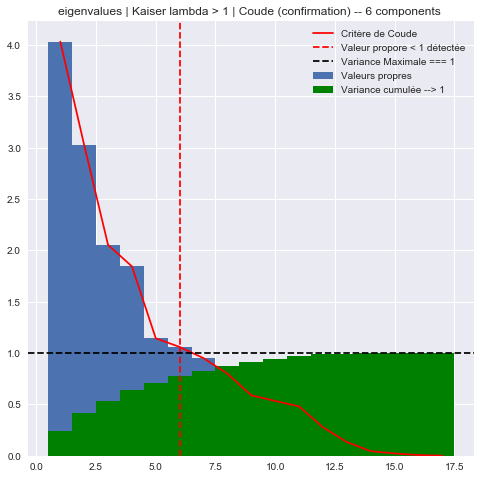

In [38]:
width = 1
xs = [elt for elt in range(1,18)]
plt.figure(figsize=(8, 8))
plt.bar(xs, pca.explained_variance_, width, align='center',label='Valeurs propres')
plt.bar(xs, cumutiveVariance, width, align='center',color="green",label='Variance cumulée --> 1')
plt.plot(xs, pca.explained_variance_,color="red",label='Critère de Coude')
plt.axvline(x=6,color='red',linestyle='--',label='Valeur propore < 1 détectée')
plt.axhline(y=1,color='black',linestyle='--',label='Variance Maximale === 1')
plt.legend()
plt.title("eigenvalues | Kaiser lambda > 1 | Coude (confirmation) -- 6 components ")
ax.set_xticks(xs)
plt.show()

      2-2- PCA and Correlation Circle

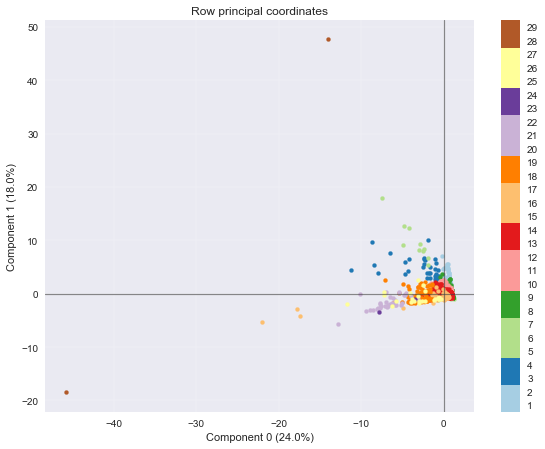

In [39]:
tmpdf = dfCluster.copy()
tmpdf["cah"]=cahResults
tmpdf= tmpdf.dropna()
tmpdf.cah  = tmpdf.cah.astype('category')
pca = prince.PCA(tmpdf, n_components=6)
pca.plot_rows(color_by='cah')
plt.show()
pca.plot_correlation_circle()
plt.show()

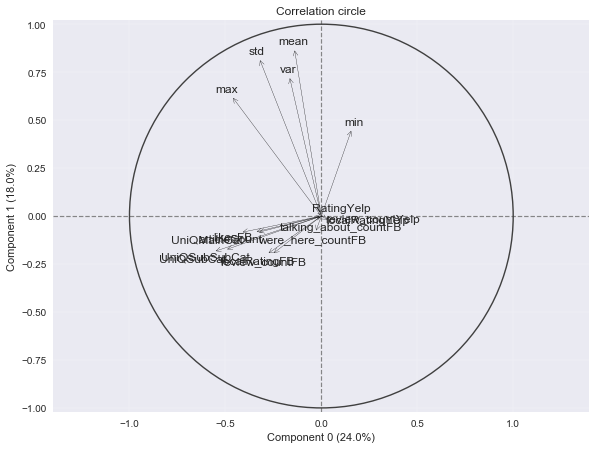

In [40]:
pca.plot_correlation_circle()
plt.show()

      2-3 Kmeans

In [41]:
kmeans = KMeans(n_clusters=29).fit(dfClusterCentred)

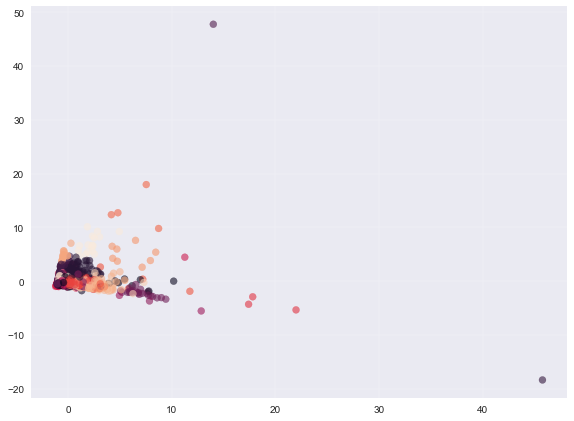

In [42]:
plt.scatter(pca_data[:,0],pca_data[:,1],c=kmeans.labels_,alpha=0.6)
plt.show()

####  VI- Textual Features Mining

In [43]:

stopWords = stopwords.words('english')+list(set(string.punctuation))+["description","yet","please","hello","hi","call","contact","mail","bye","ttyl","wait","aaa","abu","ac","yy",'without','within','yrs','xx','whether','wherever','whereas','whenever','what','whole','whose','would','well','wedges','we','via','us','ve','upon','together','thru','throughout','though','thin','they','therefore','that','re','none','must']

    0- Shallow Analysis : 

In [44]:
def grey_color(word, font_size, position, orientation, random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(50, 100)

def generateWordCloud():
    limit = 1000
    infosize = 12
    descriptionText = " ".join(df['item_description'].astype(str)+" "+df['name'].astype(str)+" "+df['brand_name'].astype(str))
    title = 'Top 1000 frequent words'
    fontcolor='black'
    bgcolor = '#000000'
    stopword =stopWords
    wordcloud = WordCloud(
        max_words=1000,
        stopwords=stopword,
        mask=imread('../input/Holmes_silhouette.png'),
        background_color=bgcolor,
    ).generate(descriptionText)
    fig = plt.figure()
    fig.set_figwidth(14)
    fig.set_figheight(18)
    plt.imshow(wordcloud.recolor(color_func=grey_color, random_state=3))
    plt.title(title, color=fontcolor, size=30, y=1.01)
    plt.axis('off')
    plt.show()

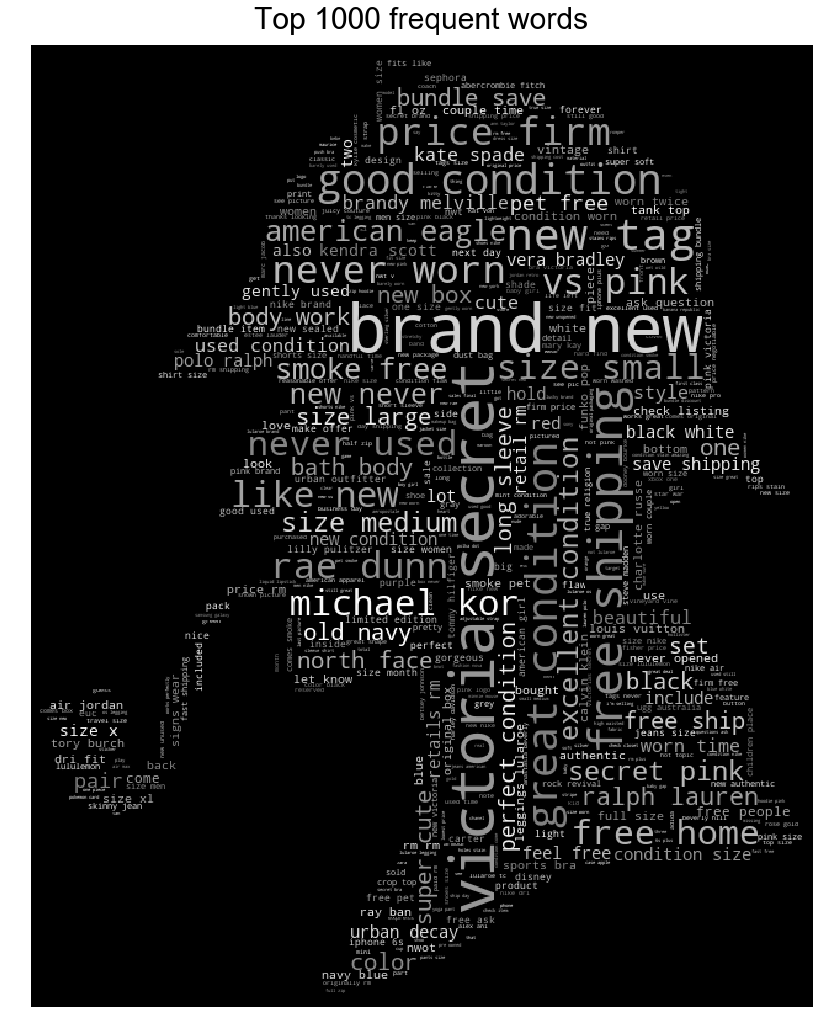

In [45]:
generateWordCloud()

We Are not detecting Bigrams ! victoria's secret for example is treated as victoria - secret

     1- Text Preprocessing :

        1-1- Defining a Tokenizer :

In [ ]:
brands = df.brand_name.unique()
brandsText = {}a
allbrandsText = ""
for brand in brands:
    dfTmp = df[df["brand_name"]==brand]
    allText = " ".join(dfTmp.item_description.values.tolist())+" "+" ".join(dfTmp.name.values.tolist())
    brandsText[brand] = allText #Vacabulary per Category
    allbrandsText+= (" "+str(allText)) #All Vocabulary

In [ ]:
#Collection a text by brand
pickle.dump(brandsText, open( "../input/tokenizing/TextperBrand.p", "wb" ) )

In [46]:
def TokenizeAndStopWordRemover(text):
    
    tknzr = TweetTokenizer()
    
    bigram_measures = nltk.collocations.BigramAssocMeasures() 
    
    #Removing Emoticons
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub('', text)
    text = re.sub("\d+", "", text) #Deleting Numbers
    for elt in [':',":",")","●","#","☆","-","■","]","❎","❤","➡","❌",'♦', '✅',"#",'✨','•','《',':',"•",'⛔','✴','♡','_','@','.']:
        match = "["+elt+']'
        text = re.sub(match, '', text) #Eliminating Emojies.
        
    text = re.sub("(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)", '', text) #Eliminating Emails.
    text = re.sub("[0-9]", '', text) #Eliminating Numbers.
    
    tokens = [word for word in tknzr.tokenize(text) if ((word not in stopWords) and (len(word)>2)) ] #Eliminating StopWords.
    
    # Match (victoria's secret -- ernst & young ...)
    bigramsRegExBased = []            
    regEx = re.finditer("[a-zA-Z]+((['][s]|([\s][&])|[&]))([\s]|[\S])[a-zA-Z]+",text , flags=0) 
    for elt in regEx:
        bigramsRegExBased.append(elt.group())
        
    bigram_fd = nltk.FreqDist(nltk.bigrams(tokens))
    word_fd = nltk.FreqDist(tokens)
    finderBi = BigramCollocationFinder.from_words(tokens)
    bigrams =[sorted(finderBi.nbest(bigram_measures.raw_freq, 2))]         
    return tokens,bigrams


In [ ]:
tokensAll,bigramsAll = TokenizeAndStopWordRemover(allbrandsText)
pickle.dump({"tokens":tokensAll,"bigrams":bigramsAll}, open( "../input/tokenizing/MergedBrandTokenized.p", "wb" ))

In [ ]:
indexBrand = {}
i = 0
for brand in brandsText:
    indexBrand[brand]=i
    i+=1
pickle.dump(indexBrand,open( "../input/tokenizing/BrandPicklerIndexer.p", "wb" ))

In [ ]:
for brand in brandsText:
    txt = brandsText[brand]
    i = indexBrand[brand]
    tokensBrand,bigramsBrand = TokenizeAndStopWordRemover(txt)
    pickle.dump({"tokens":tokensBrand,"bigrams":bigramsBrand}, open( "../input/tokenizing/Brand_"+str(i)+"_Tokenized.p", "wb" ))
    

    1-2 Lemmetizing :

Stemmming and lemmetzing are two process which do the same thing in different manners. 
A stemmer will try using mathematical rules and regex to retreive the simplest form of a word. It always returns some thing.
Possibly a stemmer returns the same word is he can't handle it. We could see some words that don't exist in dictionnary 
it not a semantic algorithm but a mathematical one. 
In the other side a lemmitizer processes diffrently it will try to find some thing which make sens. All his outputs are 
word from the doctionnary and if it don't find something it will raise an error

In [47]:
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import sent_tokenize, word_tokenize

def Lemmetizing(Tokens):
    Tok = []
    wdLem = WordNetLemmatizer()
    for tok in Tokens:
        lem = tok 
        try:
            lem = wdLem.lemmatize(tok)
        except:
            pass;
        Tok.append(lem)
    return Tok

In [ ]:
allBrands = pickle.load( open( "../input/tokenizing/MergedBrandTokenized.p", "rb" ) )
allBrandMergedTokens = Lemmetizing(allBrands["tokens"]) 
for elt in allBrands["bigrams"]:
    for eltTup in elt:
            allBrandMergedTokens.append(" ".join(eltTup))

pickle.dump({"Lemmetizer":allBrandMergedTokens}, open( "../input/lemmetizing/MergedBrandLemmetized.p", "wb" ))  

In [48]:
indexer = pickle.load( open( "../input/tokenizing/BrandPicklerIndexer.p", "rb" ) )
allBrandMergedLemmitizer = pickle.load( open( "../input/lemmetizing/MergedBrandLemmetized.p", "rb" ) )["Lemmetizer"]

for brand in indexer:
    fileNumber = str(indexer[brand])
    OneBrand = pickle.load( open( "../input/tokenizing/Brand_"+fileNumber+"_Tokenized.p", "rb" ) )

    tokBrand = Lemmetizing(OneBrand["tokens"])     
    for elt in OneBrand["bigrams"]:
        for eltTup in elt:
                tokBrand.append(" ".join(eltTup))
                      
    pickle.dump({"Lemmetizer":tokBrand}, open( "../input/lemmetizing/Brand_"+fileNumber+"_Lemmetized.p", "wb" ))
    

        1-3 tf-idf : Getting Top Features by Brand

    - Constructing a Brand's dictionnary : 

In [72]:
stop =  ["a's","aab","aac","unused","unlocked","crop","never","ask","back","check","original","online","listing","manual","generation","work","working","save","may","purchase","purshase","damage","minnie","authentic","perfect","medium","background","dunn","exact","flaw","full","great","happy","imperfection","like","purse","receive","responsible","retail","sample","time","use","wick","per","shipping","month","shipped","question","answer","faq","logo","beautiful","condition","print","tested","used","mint","package","item","price","new","nwt","description","excellent","sale","blue","good","case","final","free","ship","shiping","exclusive","large","old","washed","plus","bnwt","one","set","white","black","come","firm","super","inside","mist","day","super"]
def getTOPWords(listOfWords,number):
    a = dict(Counter(listOfWords))
    sorted_x = sorted(a.items(), key=operator.itemgetter(1),reverse=True)
    i=0
    relevantWords =[]
    for elt in sorted_x:
        if elt[0] not in stop and len(elt[0]) >3 :
            relevantWords.append(elt[0])
            i+=1
            if(i == number):
                return relevantWords
    return relevantWords

In [50]:
brandForCA = [ el[0] for el in resultbrand[["brand_name"]].values.tolist()[:5]] +[ el[0] for el in resultbrand[["brand_name"]].values.tolist()[1002:1005]] 

In [153]:
Dictonnary = []
for brand in brandForCA:
    fileNumber = str(indexer[brand])
    LemBrand = pickle.load( open("../input/lemmetizing/Brand_"+fileNumber+"_Lemmetized.p", "rb" ) )["Lemmetizer"]
    Dictonnary = Dictonnary + getTOPWords(LemBrand,100)
Dictonnary = set(Dictonnary)
len(Dictonnary)

370

    -1-4 Last TF-IDF On Brands:

In [154]:
def tokenize(text):
    tokens, big = TokenizeAndStopWordRemover(text)
    lemm = [elt for elt in Lemmetizing(tokens) if len(elt) > 2]
    bigramsRegExBased = []                
    for elt in big:
        for eltTup in elt:
            lemm.append(" ".join(eltTup))
    return lemm

In [155]:
Corpus = []
indeces = []
for brand in brandForCA: 
    fileNumber = str(indexer[brand])
    Corpus.append(" ".join(pickle.load(open("../input/lemmetizing/Brand_"+fileNumber+"_Lemmetized.p", "rb" ) )["Lemmetizer"]))
    indeces.append(brand)

In [156]:
finalVect = TfidfVectorizer(vocabulary=Dictonnary,tokenizer=tokenize,stop_words=stopWords+stop,analyzer = 'word',ngram_range=(1,3))

In [157]:
Corpus_tf_idf = finalVect.fit_transform(Corpus)

In [158]:
i=0
dfX = pd.DataFrame()
for col in Dictonnary:
    dfX[col] = pd.SparseSeries(Corpus_tf_idf[:, i].toarray().ravel(), fill_value=0)
    i=i+1

In [159]:
pickle.dump({"tfidf":finalVect,"fit":Corpus_tf_idf}, open( "../input/tfidf/Last.p", "wb" ))

In [160]:
Corpus_tf_idf = pickle.load(open( "../input/tfidf/Last.p", "rb" ))["fit"]
finalVect = pickle.load(open( "../input/tfidf/Last.p", "rb" ))["tfidf"]

In [161]:
dftfidf = pd.DataFrame((Corpus_tf_idf.toarray()),columns=Dictonnary)
dftfidf.index = indeces
dftfidf.head()

,detail,button,lined,show,prop,cord,skirt,apple,love,small,...,elite,feather,slide,comfy,solid,wall,includes,randy,free shipping,sandal
nike,0.000000,0.016301,0.005966,0.013393,0.003134,0.000000,0.000000,0.0,0.0,0.000000,...,0.023470,0.003214,0.036965,0.082426,0.017724,0.014439,0.150846,0.010638,0.003286,0.065024
pink,0.000000,0.000666,0.006770,0.010505,0.003820,0.000000,0.000477,0.0,0.0,0.001049,...,0.007816,0.001184,0.002071,0.004439,0.009277,0.004346,0.103792,0.005622,0.042874,0.000110
victoria's secret,0.000000,0.000993,0.020075,0.016556,0.004422,0.000000,0.000996,0.0,0.0,0.041811,...,0.001707,0.002428,0.002539,0.003863,0.008230,0.008604,0.105738,0.005408,0.020824,0.000000
lularoe,0.000000,0.000129,0.000000,0.004655,0.003684,0.056442,0.023491,0.0,0.0,0.000333,...,0.000000,0.001034,0.001552,0.003362,0.012417,0.001461,0.184516,0.019395,0.001023,0.000000
apple,0.075227,0.000960,0.000867,0.033010,0.005297,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000960,0.000000,0.000000,0.000000,0.003838,0.001727,0.000000,0.000000


In [162]:
dfX.head()

,detail,button,lined,show,prop,cord,skirt,apple,love,small,...,elite,feather,slide,comfy,solid,wall,includes,randy,free shipping,sandal
0,0.000000,0.016301,0.005966,0.013393,0.003134,0.000000,0.000000,0.0,0.0,0.000000,...,0.023470,0.003214,0.036965,0.082426,0.017724,0.014439,0.150846,0.010638,0.003286,0.065024
1,0.000000,0.000666,0.006770,0.010505,0.003820,0.000000,0.000477,0.0,0.0,0.001049,...,0.007816,0.001184,0.002071,0.004439,0.009277,0.004346,0.103792,0.005622,0.042874,0.000110
2,0.000000,0.000993,0.020075,0.016556,0.004422,0.000000,0.000996,0.0,0.0,0.041811,...,0.001707,0.002428,0.002539,0.003863,0.008230,0.008604,0.105738,0.005408,0.020824,0.000000
3,0.000000,0.000129,0.000000,0.004655,0.003684,0.056442,0.023491,0.0,0.0,0.000333,...,0.000000,0.001034,0.001552,0.003362,0.012417,0.001461,0.184516,0.019395,0.001023,0.000000
4,0.075227,0.000960,0.000867,0.033010,0.005297,0.000000,0.000000,0.0,0.0,0.000000,...,0.000000,0.000000,0.000960,0.000000,0.000000,0.000000,0.003838,0.001727,0.000000,0.000000


    - AFC : 

In [163]:
ca = prince.CA(dftfidf,n_components=5)

ValueError: could not broadcast input array from shape (0) into shape (8)

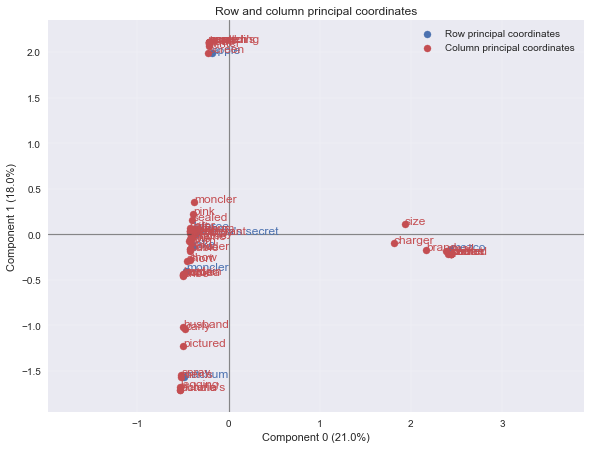

In [139]:
ca.plot_rows_columns(show_row_labels=True, show_column_labels=True)
plt.show()

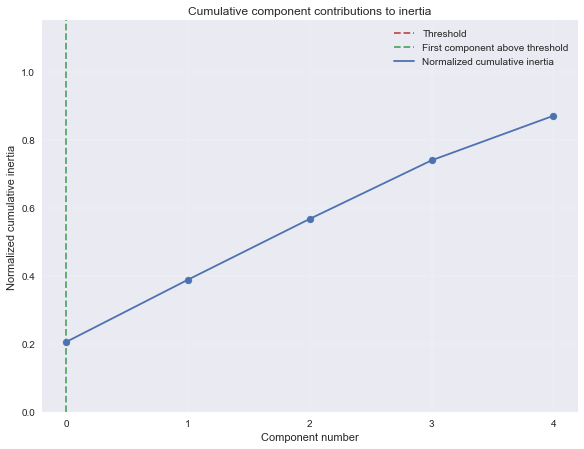

In [138]:
ca.plot_cumulative_inertia(threshold=-1)
plt.show()